In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

In [2]:
df = pd.read_csv('clean2.csv', index_col=0)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop(list(df[df['State'] == 'UNK'].index), axis=0, inplace=True)
df_copy = df.copy()

In [3]:
# combine features
df_copy['USDPerJobCreated'] = df_copy['DisbursementGross'] / (df_copy['CreateJob'] + 1)  # how many dollars is needed to create 1 job
df_copy['DisbursePerEmployee'] = df_copy['DisbursementGross'] / (df_copy['NoEmp'] + 1)  # how many dollars an employee get
df_copy['GrSBA_AppvDiff%'] = ((df_copy['GrAppv'] - df_copy['SBA_Appv']) / df_copy['GrAppv']) * 100

In [4]:
# in order to group by, we transform MIS_Status into binary
df_copy['MIS_Status'] = df_copy['MIS_Status'].map({'CHGOFF': 1, 'P I F': 0})
df_copy = df_copy.rename(columns={'MIS_Status': 'Default'})

In [5]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
            'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'GrSBA_AppvDiff%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome']
display(df_copy[num_features].describe())
df_copy[num_features] = df_copy[num_features].astype('float64')
display(df_copy[num_features].dtypes)

Default  ChgOffPrinGr           Term  DisbursementGross  \
count  899153.000000  8.991530e+05  899153.000000       8.991530e+05   
mean        0.182530  1.358492e+04     110.773138       2.011521e+05   
std         0.386281  6.514517e+04      78.857151       2.876386e+05   
min         0.000000  0.000000e+00       0.000000       0.000000e+00   
25%         0.000000  0.000000e+00      60.000000       4.200000e+04   
50%         0.000000  0.000000e+00      84.000000       1.000000e+05   
75%         0.000000  0.000000e+00     120.000000       2.380000e+05   
max         1.000000  3.512596e+06     569.000000       1.144632e+07   

       GrSBA_AppvDiff%  DisbursePerEmployee  USDPerJobCreated          NoEmp  \
count    899153.000000         8.991530e+05      8.991530e+05  899153.000000   
mean         29.061625         3.225785e+04      1.443573e+05      11.411308   
std          17.378155         6.270575e+04      2.378652e+05      74.108606   
min           0.000000         0.000000e+00      0.000000e+00       0.000000   
25%          15.000000         7.142857e+03      2.500000e+04       2.000000   
50%          25.000000         1.509091e+04      6.000000e+04       4.000000   
75%          50.000000         3.321429e+04      1.500000e+05      10.000000   
max          97.186004         5.000000e+06      1.144632e+07    9999.000000   

           CreateJob    RetainedJob     Population    PopDensity  \
count  899153.000000  899153.000000  899153.000000  899153.00000   
mean        8.410906      10.777815   28523.770671    4005.51228   
std       236.326153     236.759448   17998.402810    9078.45970   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       0.000000   15228.000000     377.00000   
50%         0.000000       1.000000   27107.000000    1779.00000   
75%         1.000000       4.000000   38803.000000    4090.00000   
max      8800.000000    9500.000000  113916.000000  172372.00000   

             GrAppv      SBA_Appv   HousingUnits  OccupiedHousingUnits  \
count  8.991530e+05  8.991530e+05  899153.000000         899153.000000   
mean   1.926849e+05  1.494872e+05   11871.486278          10805.214375   
std    2.832610e+05  2.284131e+05    6939.157395           6412.435448   
min    2.000000e+02  1.000000e+02       0.000000              0.000000   
25%    3.500000e+04  2.125000e+04    6776.000000           6047.000000   
50%    9.000000e+04  6.125000e+04   11512.000000          10533.000000   
75%    2.250000e+05  1.750000e+05   16187.000000          14820.000000   
max    5.472000e+06  5.472000e+06   47617.000000          44432.000000   

       MedianHomeValue  MedianHouseholdIncome  
count     8.991530e+05          899153.000000  
mean      2.516407e+05           59023.611118  
std       1.733489e+05           23035.607174  
min       9.999000e+03            2499.000000  
25%       1.355000e+05           42940.000000  
50%       1.963000e+05           54126.000000  
75%       3.157000e+05           71192.000000  
max       1.000001e+06          250001.000000

Default                  float64
ChgOffPrinGr             float64
Term                     float64
DisbursementGross        float64
GrSBA_AppvDiff%          float64
DisbursePerEmployee      float64
USDPerJobCreated         float64
NoEmp                    float64
CreateJob                float64
RetainedJob              float64
Population               float64
PopDensity               float64
GrAppv                   float64
SBA_Appv                 float64
HousingUnits             float64
OccupiedHousingUnits     float64
MedianHomeValue          float64
MedianHouseholdIncome    float64
dtype: object

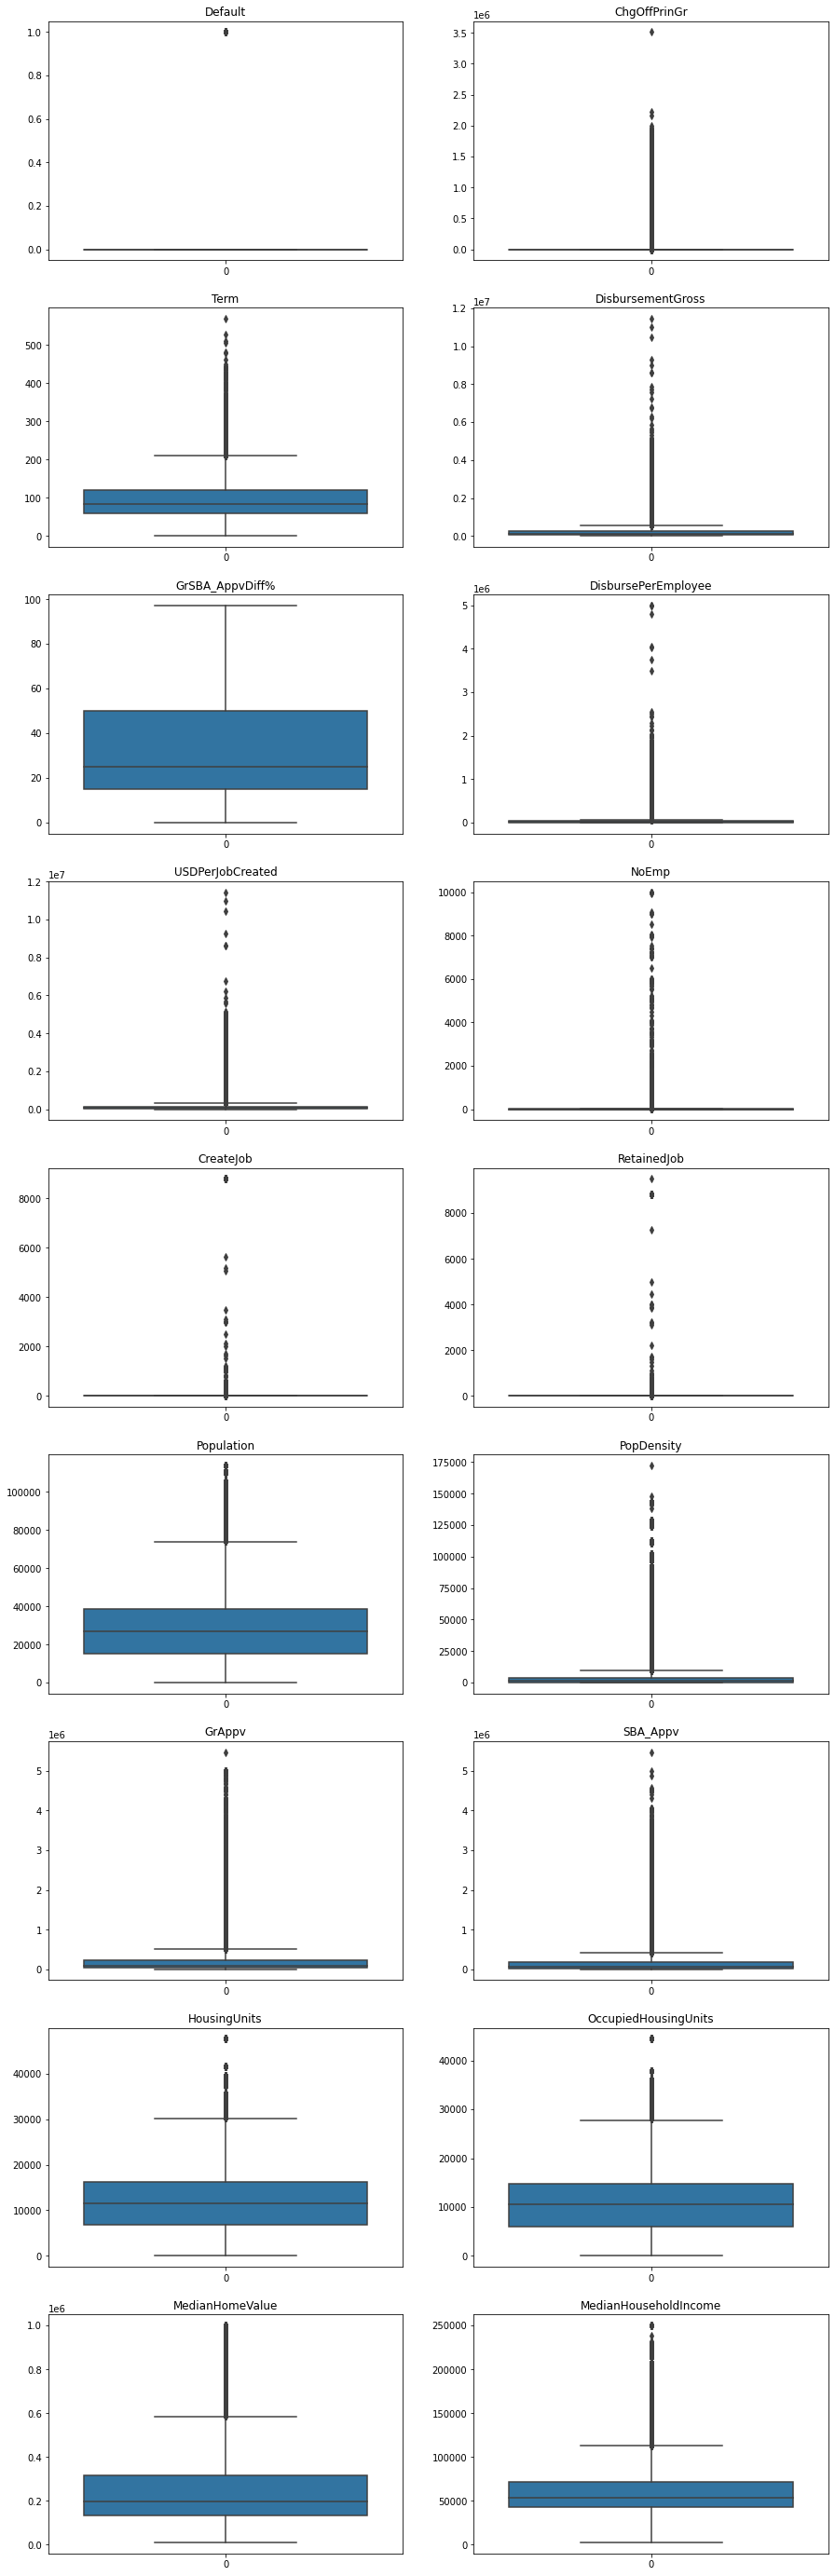

<Figure size 720x720 with 0 Axes>

In [38]:
# 透過boxplot檢查outlier
plt.figure(figsize=(15, 50))

for i in range(len(num_features)):
    plt.subplot(len(num_features) // 2, 2, i + 1)
    plt.title(num_features[i])
    sns.boxplot(data=df_copy[num_features[i]])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(len(num_features)):
    plt.title(num_features[i])
    sns.boxplot(data=df_copy[num_features[i]])
    plt.savefig('boxplot_{}.jpg'.format(num_features[i]))
    plt.clf()

data contains 141643 rows and was divided into 17 groups.
data contains 812173 rows and was divided into 20 groups.
data contains 850295 rows and was divided into 20 groups.
data contains 500147 rows and was divided into 19 groups.
data contains 853772 rows and was divided into 20 groups.
data contains 853170 rows and was divided into 20 groups.
data contains 715569 rows and was divided into 20 groups.
data contains 246646 rows and was divided into 18 groups.
data contains 436012 rows and was divided into 19 groups.
data contains 854128 rows and was divided into 20 groups.
data contains 853364 rows and was divided into 20 groups.
data contains 850003 rows and was divided into 20 groups.
data contains 848702 rows and was divided into 20 groups.
data contains 854087 rows and was divided into 20 groups.
data contains 854093 rows and was divided into 20 groups.
data contains 854165 rows and was divided into 20 groups.
data contains 854085 rows and was divided into 20 groups.


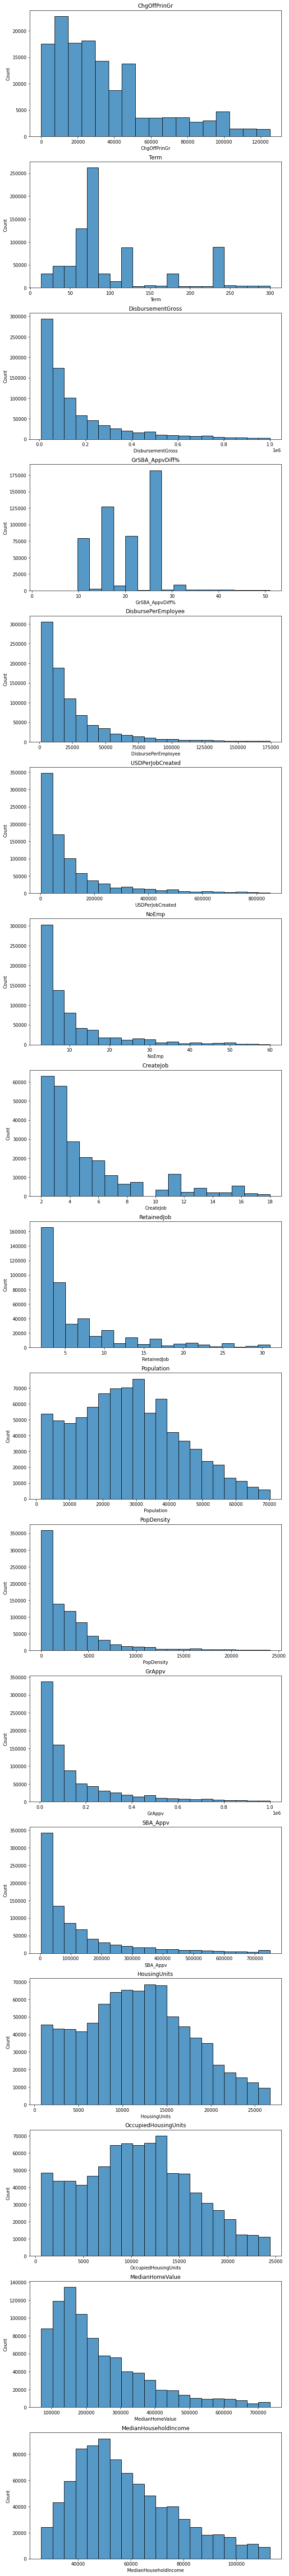

<Figure size 720x720 with 0 Axes>

In [57]:
df_log = df_copy.copy()
df_log[num_features] = df_log[num_features] + 1

# 視覺化數值型欄位
count = 1

plt.figure(figsize=(10,110))
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue
    
    plt.subplot(len(num_features), 1, count)
    plt.title(num_features[i])
    
    binnum = math.floor(1 + 3.3 * np.log10(len(vis)))
    print('data contains {} rows and was divided into {} groups.'.format(len(vis), binnum))
    
    sns.histplot(data=vis, log_scale=False, bins=binnum)
    count += 1
plt.show()

# save to file
plt.figure(figsize=(10,10))
count = 1
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue

    plt.title(num_features[i])
    
    binnum = math.floor(1 + 3.3 * np.log10(len(vis)))
    sns.histplot(data=vis, log_scale=False, bins=binnum)
    plt.savefig('histogram_{}.jpeg'.format(num_features[i]))
    plt.clf()
    count += 1

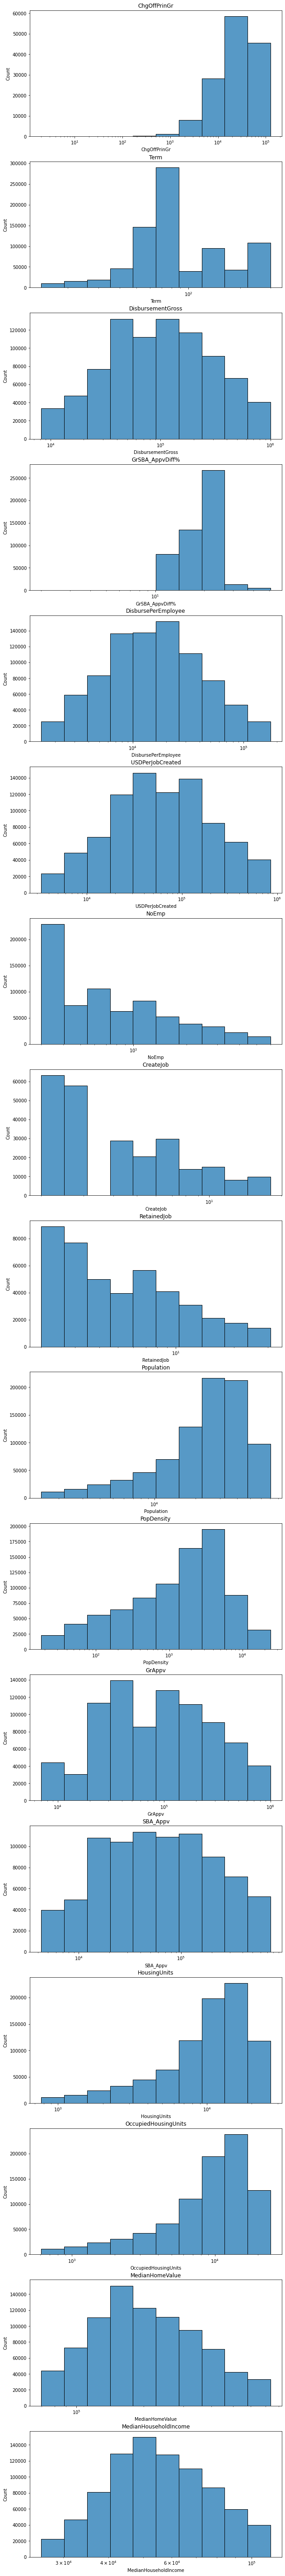

<Figure size 720x720 with 0 Axes>

In [41]:
# 視覺化數值型欄位(去偏)
count = 1

plt.figure(figsize=(10,110))
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue
    
    plt.subplot(len(num_features), 1, count)
    plt.title(num_features[i])
    
    sns.histplot(data=vis, log_scale=True, bins=10)
    count += 1
plt.show()

# save to file
count = 1

plt.figure(figsize=(10,10))
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue

    plt.title(num_features[i])
    sns.histplot(data=vis, log_scale=True, bins=10)
    plt.savefig('log_histogram_{}.jpg'.format(num_features[i]))
    plt.clf()
    count += 1

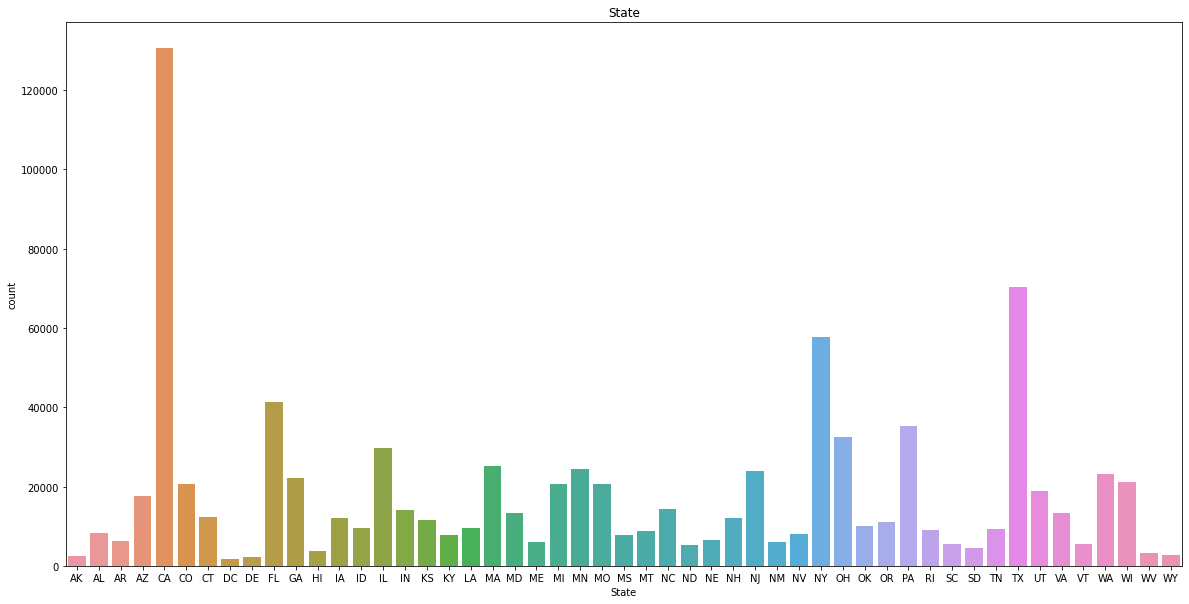

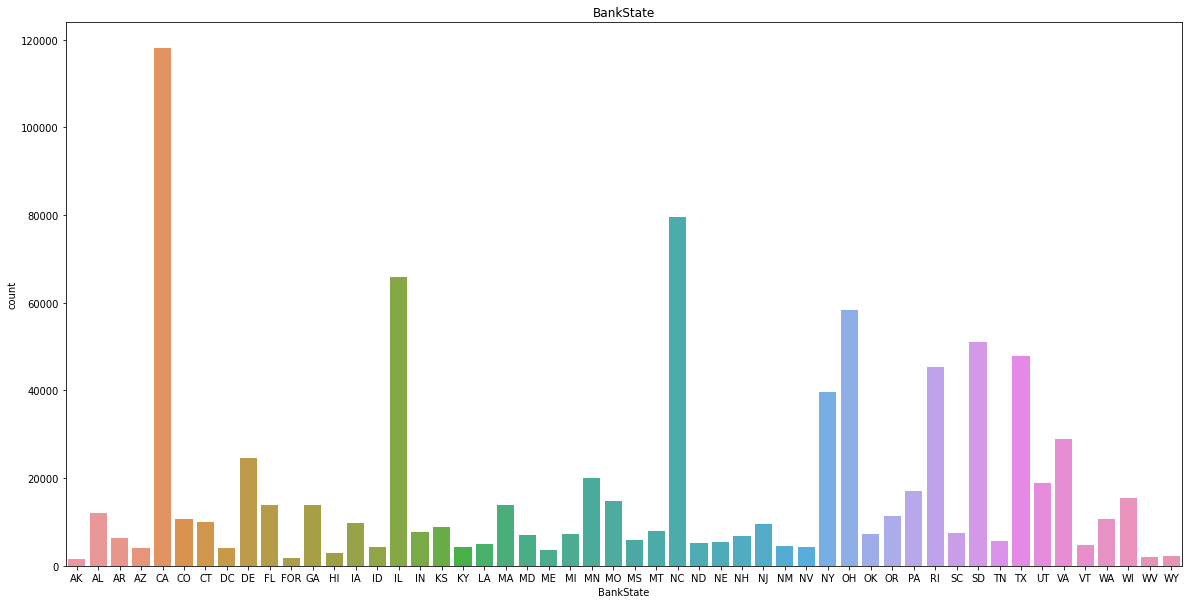

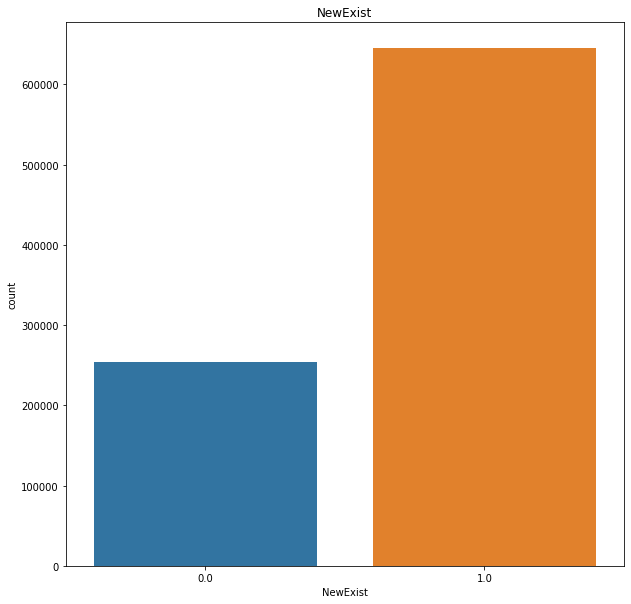

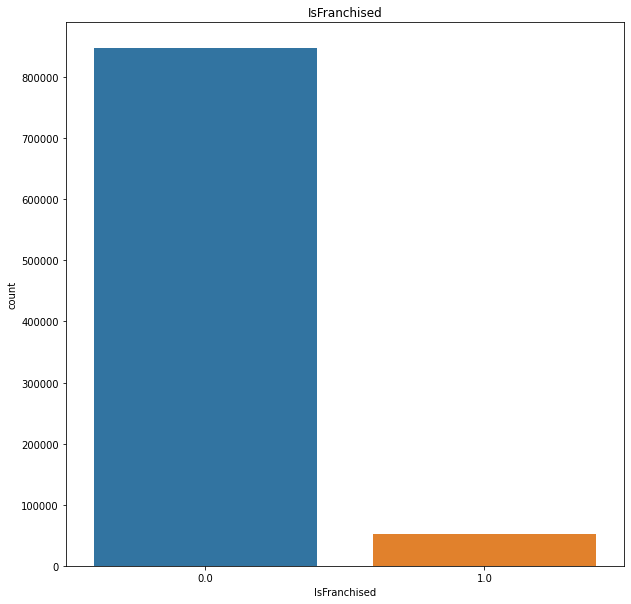

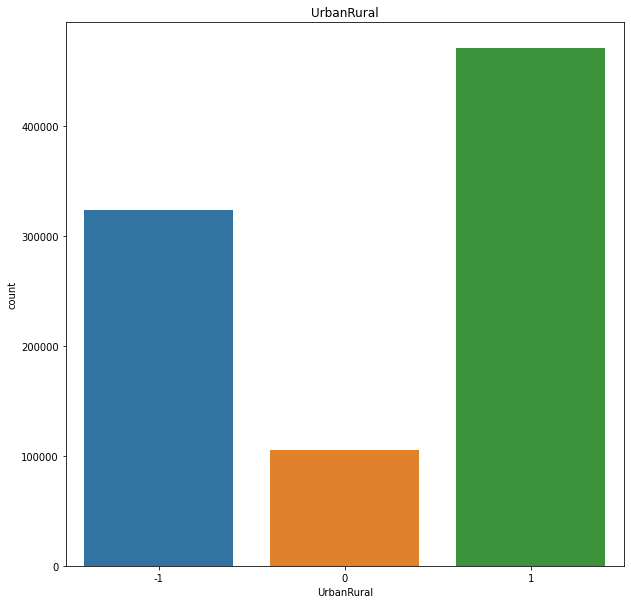

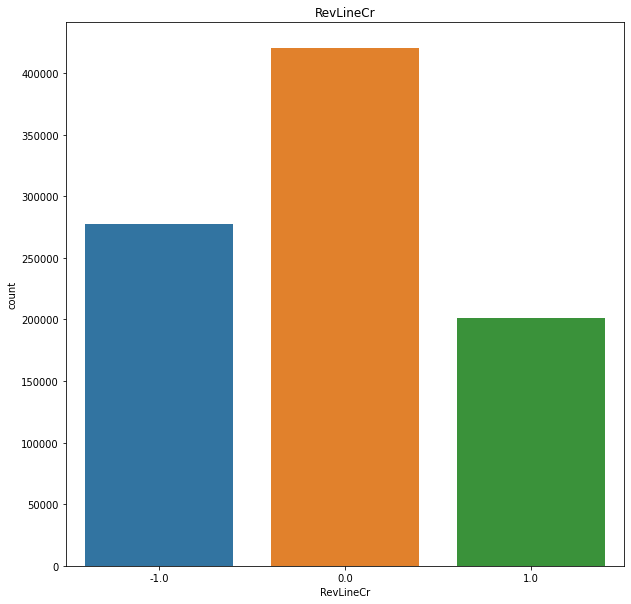

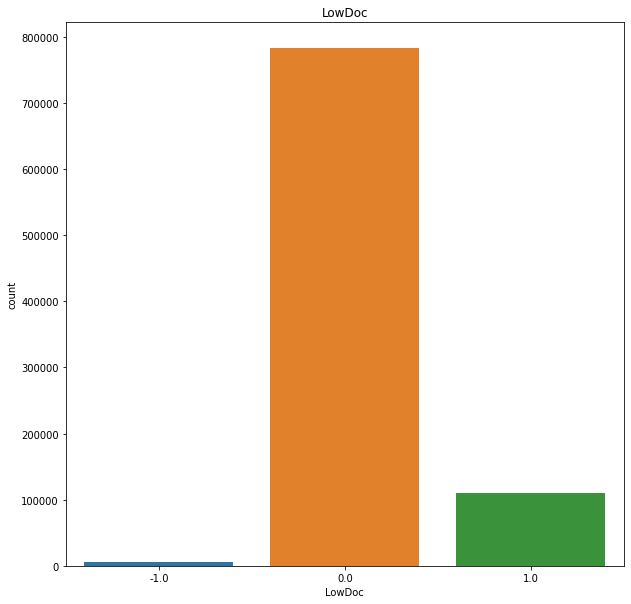

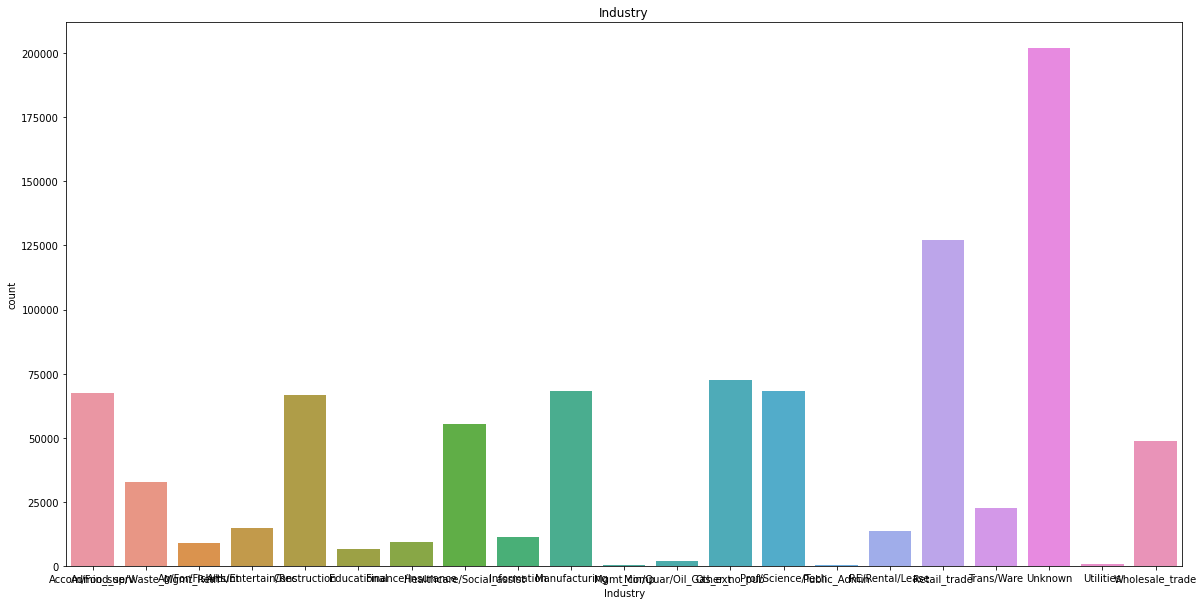

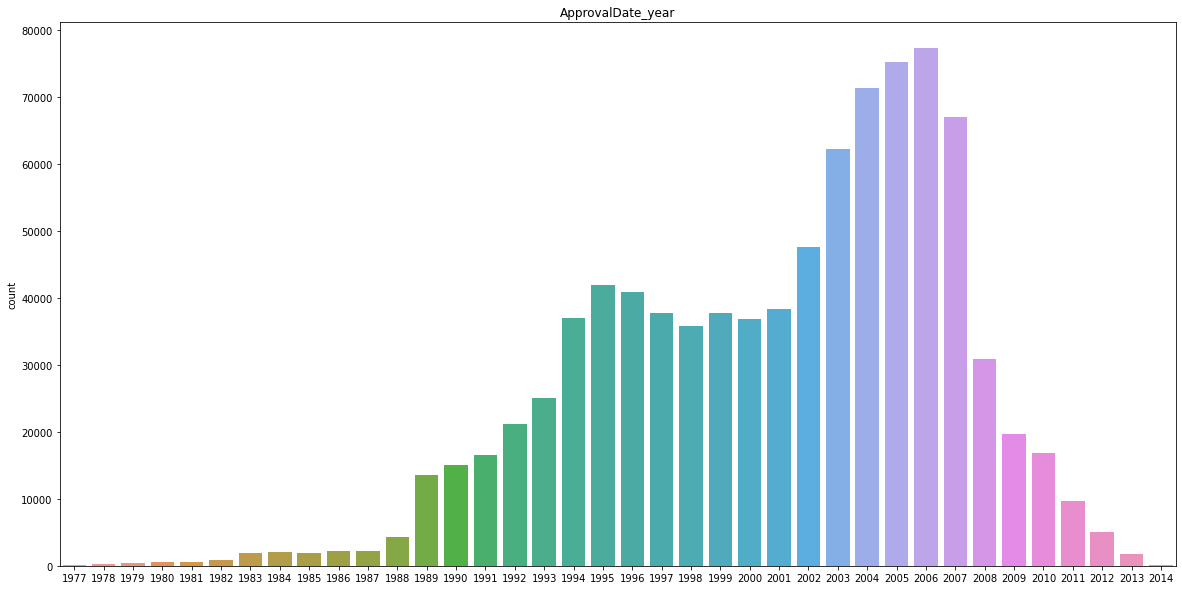

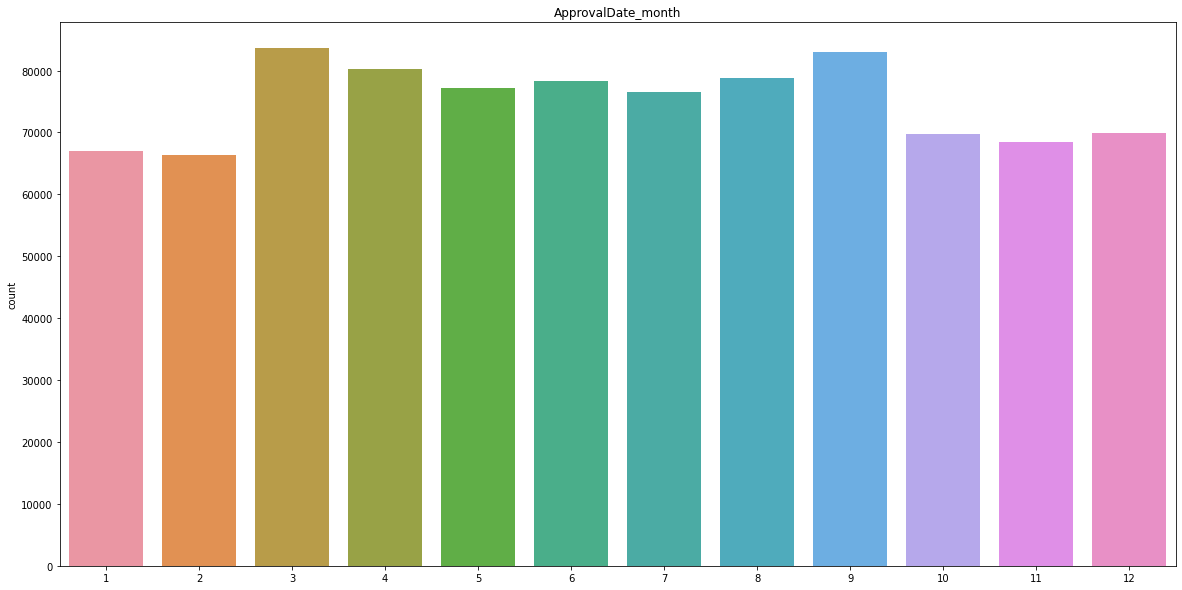

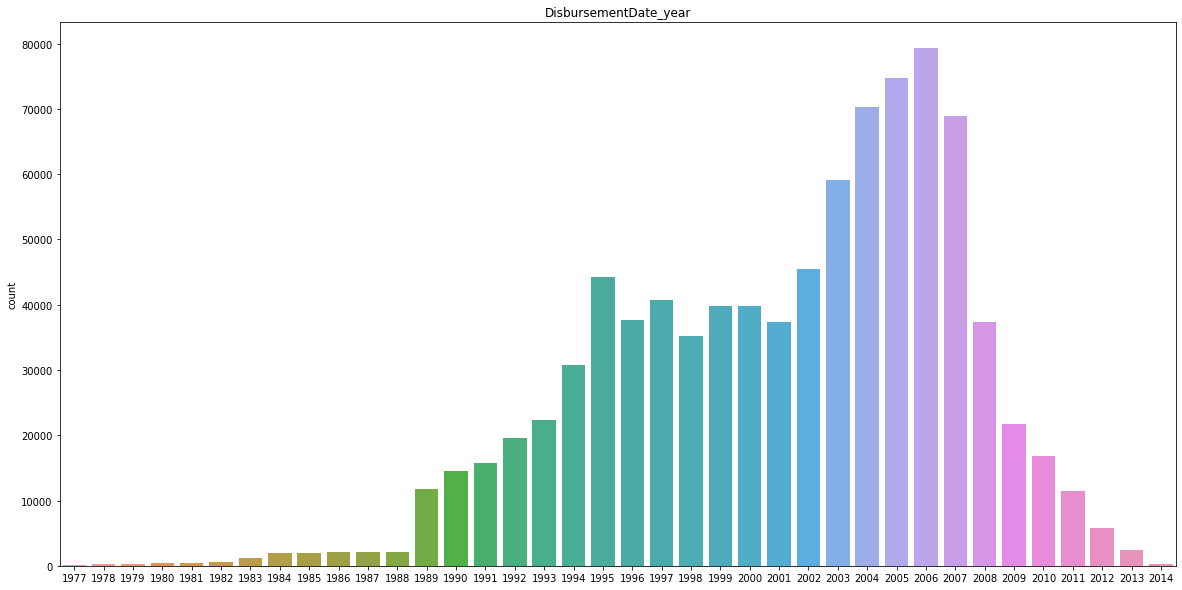

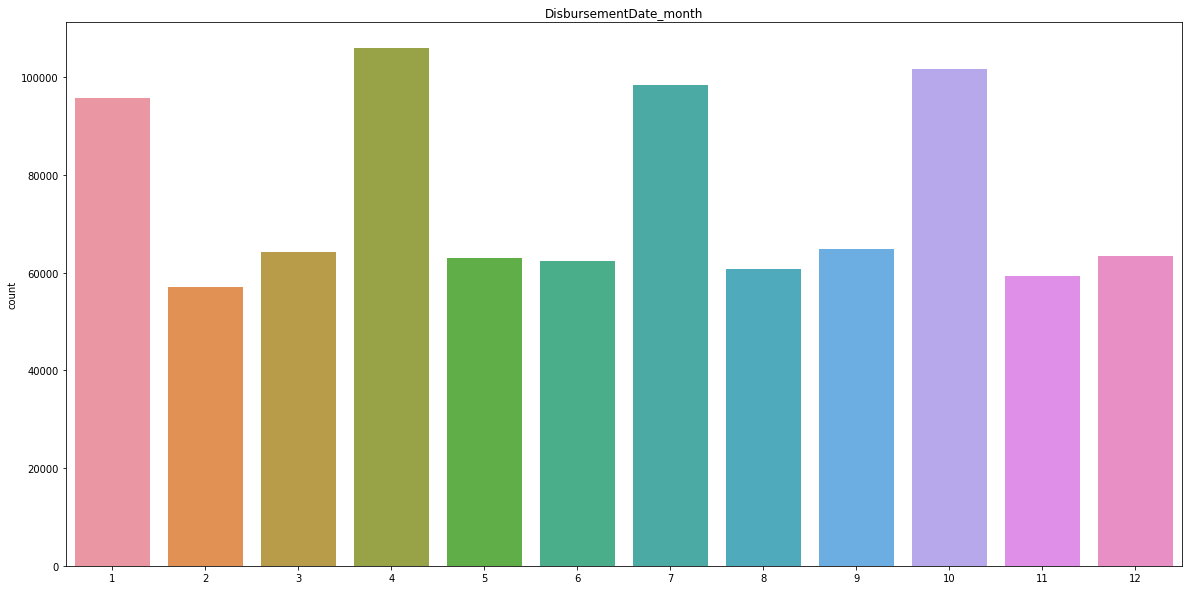

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [64]:
# 類別型欄位視覺化
# plt.figure(figsize=(20,140))
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

for i in range(len(obj_features)):
    df_temp = pd.DataFrame(df_copy.groupby(obj_features[i]).size(), columns=['count'])
    df_temp = df_temp[~(df_temp.values < 100)]
    
    if len(df_temp.index) < 8:
        plt.figure(figsize=(10, 10))
    else:
        plt.figure(figsize=(20, 10))

#     plt.subplot(len(obj_features), 1, i + 1)
    plt.title(obj_features[i])
    
    if obj_features[i] in time_cols:
        df_temp.index = [int(i) for i in list(df_temp.index)]
    sns.barplot(x=df_temp.index, y=df_temp['count'])

    plt.show()

# save to file

for i in range(len(obj_features)):
    df_temp = pd.DataFrame(df_copy.groupby(obj_features[i]).size(), columns=['count'])
    df_temp = df_temp[~(df_temp.values < 100)]
    
    if len(df_temp.index) < 8:
        plt.figure(figsize=(10, 10))
    else:
        plt.figure(figsize=(20, 10))
    
    plt.title(obj_features[i])
    
    if obj_features[i] in time_cols:
        df_temp.index = [int(i) for i in list(df_temp.index)]

    sns.barplot(x=df_temp.index, y=df_temp['count'])
    plt.savefig('barplot_{}.jpeg'.format(obj_features[i]))
    plt.clf()

In [10]:
df_groupby_mean = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]

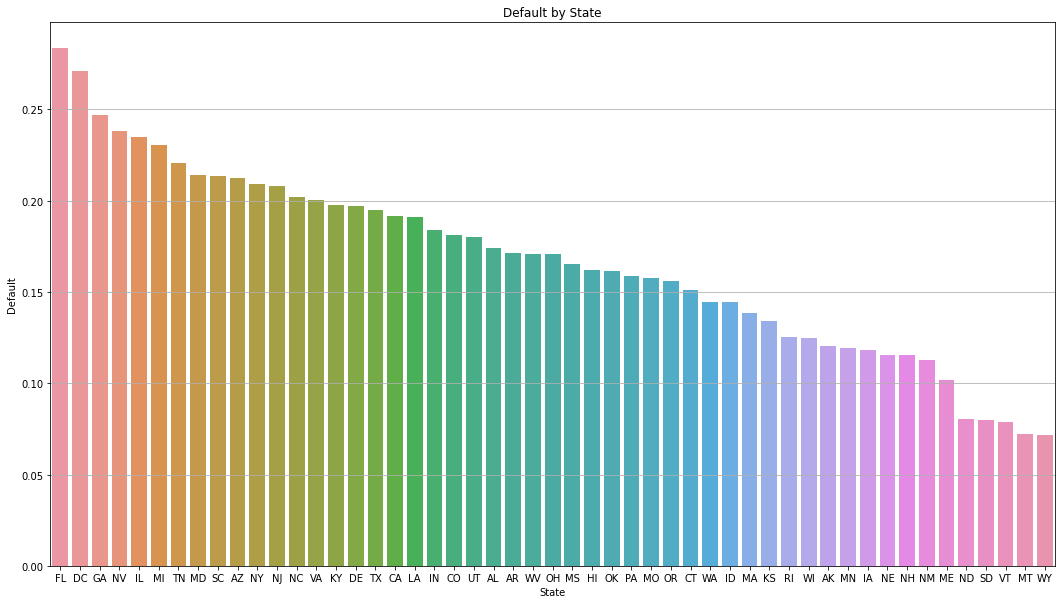

In [11]:
plt.figure(figsize=(18,10))
vis = df_groupby_mean['State'].sort_values(by='Default', ascending=False)
plt.title('Default by State')
plt.grid(True)
sns.barplot(x=vis.index, y=vis['Default'])
plt.show()

# NewExist

1.0    645132
0.0    254021
Name: NewExist, dtype: int64

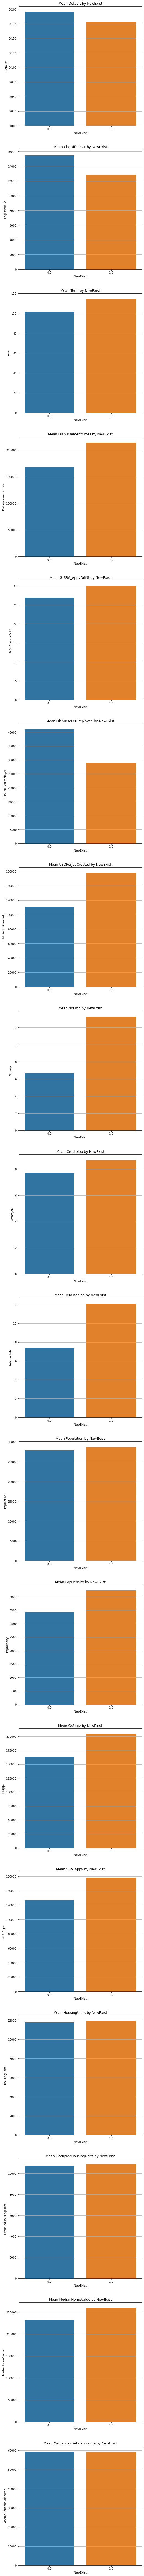

<Figure size 576x720 with 0 Axes>

In [44]:
display(df_copy['NewExist'].value_counts())
plt.figure(figsize=(8,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['NewExist'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by NewExist'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(8,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['NewExist'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by NewExist'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_NewExist.jpeg'.format(num))
    plt.clf()

# State mean

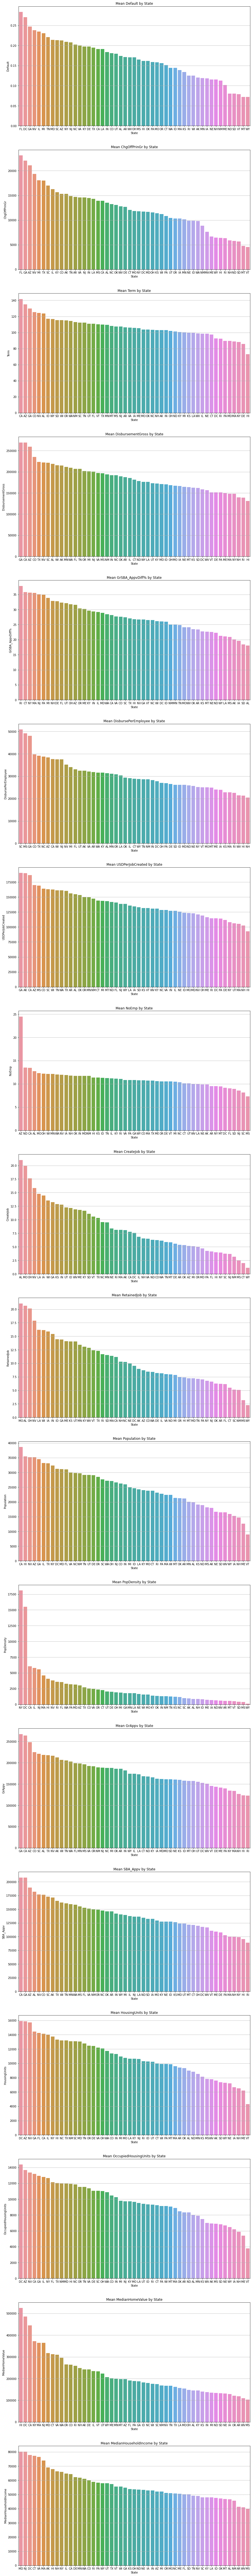

<Figure size 1080x720 with 0 Axes>

In [45]:
plt.figure(figsize=(15,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['State'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by State'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(15,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['State'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by State'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_State.jpeg'.format(num))
    plt.clf()

# UrbanRural

 1    470652
-1    323158
 0    105343
Name: UrbanRural, dtype: int64

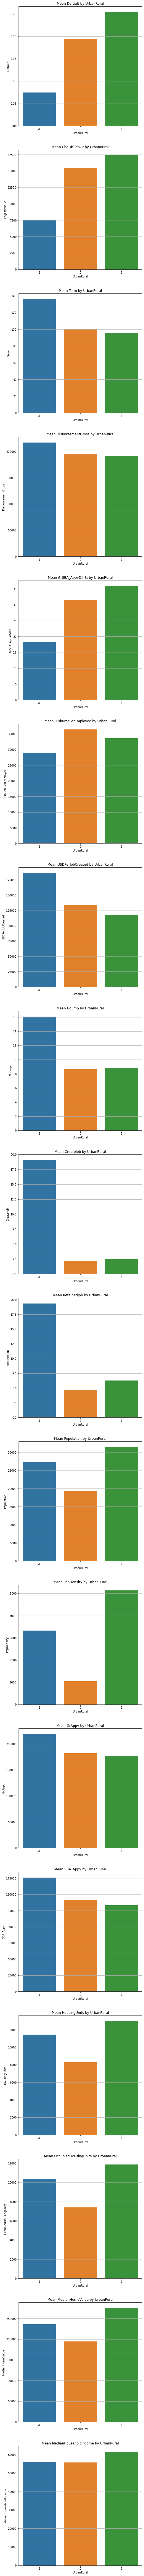

<Figure size 576x720 with 0 Axes>

In [46]:
display(df_copy['UrbanRural'].value_counts())

plt.figure(figsize=(8,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['UrbanRural'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by UrbanRural'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(8,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['UrbanRural'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by UrbanRural'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_UrbanRural.jpeg'.format(num))
    plt.clf()

# IsFranchised

0.0    847380
1.0     51773
Name: IsFranchised, dtype: int64

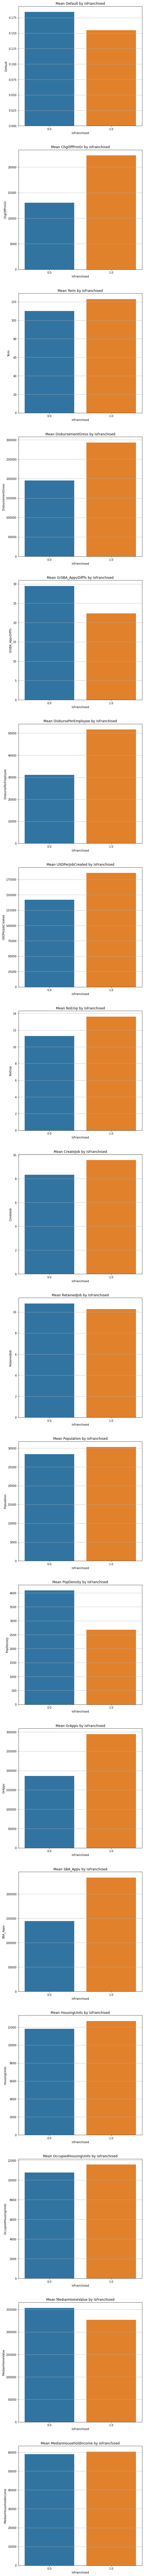

<Figure size 576x720 with 0 Axes>

In [47]:
display(df_copy['IsFranchised'].value_counts())

plt.figure(figsize=(8,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['IsFranchised'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by IsFranchised'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(8,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['IsFranchised'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by IsFranchised'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_IsFranchised.jpeg'.format(num))
    plt.clf()

# RevLineCr

 0.0    420278
-1.0    277478
 1.0    201397
Name: RevLineCr, dtype: int64

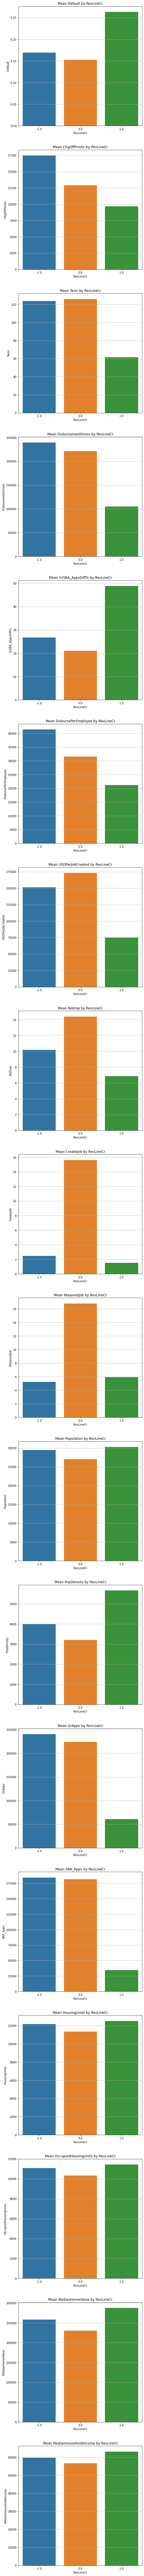

<Figure size 576x720 with 0 Axes>

In [48]:
display(df_copy['RevLineCr'].value_counts())

plt.figure(figsize=(8,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['RevLineCr'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by RevLineCr'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(8,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['RevLineCr'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by RevLineCr'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_RevLineCr.jpeg'.format(num))
    plt.clf()

# LowDoc

 0.0    782812
 1.0    110334
-1.0      6007
Name: LowDoc, dtype: int64

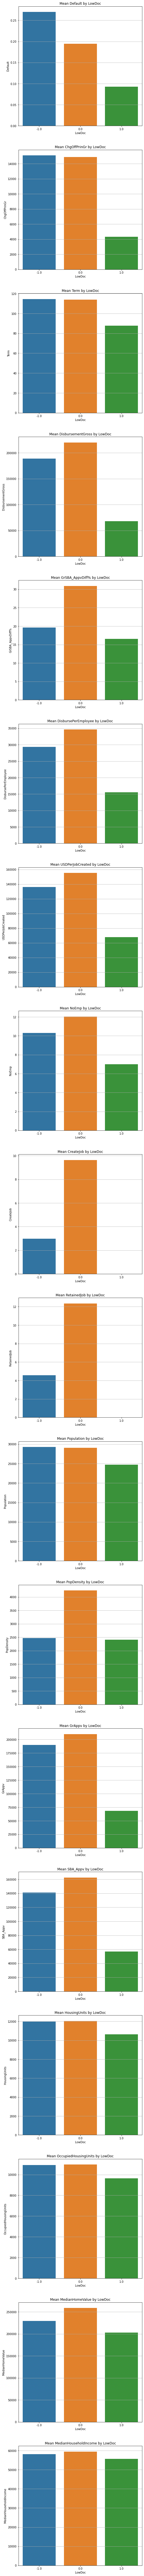

<Figure size 576x720 with 0 Axes>

In [49]:
display(df_copy['LowDoc'].value_counts())

plt.figure(figsize=(8,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['LowDoc'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by LowDoc'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(8,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['LowDoc'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by LowDoc'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_LowDoc.jpeg'.format(num))
    plt.clf()

# Industry

Unknown                     201942
Retail_trade                127250
Other_no_pub                 72618
Prof/Science/Tech            68169
Manufacturing                68029
Accom/Food_serv              67598
Construction                 66645
Healthcare/Social_assist     55366
Wholesale_trade              48743
Admin_sup/Waste_Mgmt_Rem     32685
Trans/Ware                   22531
Arts/Entertain/Rec           14640
RE/Rental/Lease              13632
Information                  11379
Finance/Insurance             9496
Ag/For/Fish/Hunt              9005
Educational                   6425
Min/Quar/Oil_Gas_ext          1851
Utilities                      663
Mgmt_comp                      257
Public_Admin                   229
Name: Industry, dtype: int64

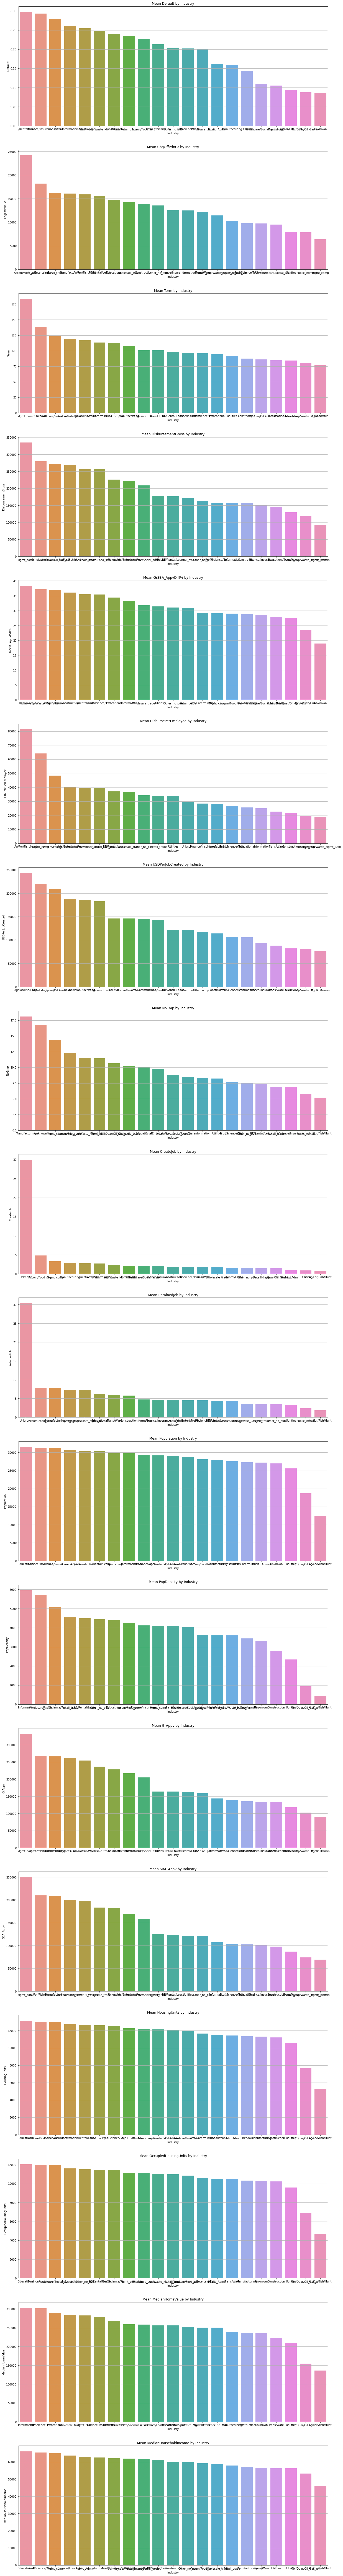

<Figure size 1800x720 with 0 Axes>

In [50]:
display(df_copy['Industry'].value_counts())

plt.figure(figsize=(20,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['Industry'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by Industry'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
plt.show()

plt.figure(figsize=(25,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['Industry'].sort_values(by=num, ascending=False)
    plt.title('Mean {} by Industry'.format(num))
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig('Mean_{}_Industry.jpeg'.format(num))
    plt.clf()

# ApprovalDate_year

2006.0    77247
2005.0    75115
2004.0    71281
2007.0    67016
2003.0    62246
2002.0    47496
1995.0    41847
1996.0    40846
2001.0    38370
1997.0    37744
1999.0    37693
1994.0    37030
2000.0    36795
1998.0    35782
2008.0    30786
1993.0    25031
1992.0    21122
2009.0    19696
2010.0    16774
1991.0    16484
1990.0    15002
1989.0    13574
2011.0     9670
2012.0     5053
1988.0     4332
1986.0     2195
1987.0     2139
1984.0     1993
1985.0     1981
1983.0     1848
2013.0     1732
1982.0      852
1981.0      598
1980.0      576
1979.0      361
1978.0      270
1977.0      141
2014.0      128
1976.0       88
1975.0       49
1972.0       46
1973.0       46
1974.0       32
1970.0       19
1971.0       15
1969.0        4
1967.0        3
1968.0        3
1964.0        1
1961.0        1
Name: ApprovalDate_year, dtype: int64

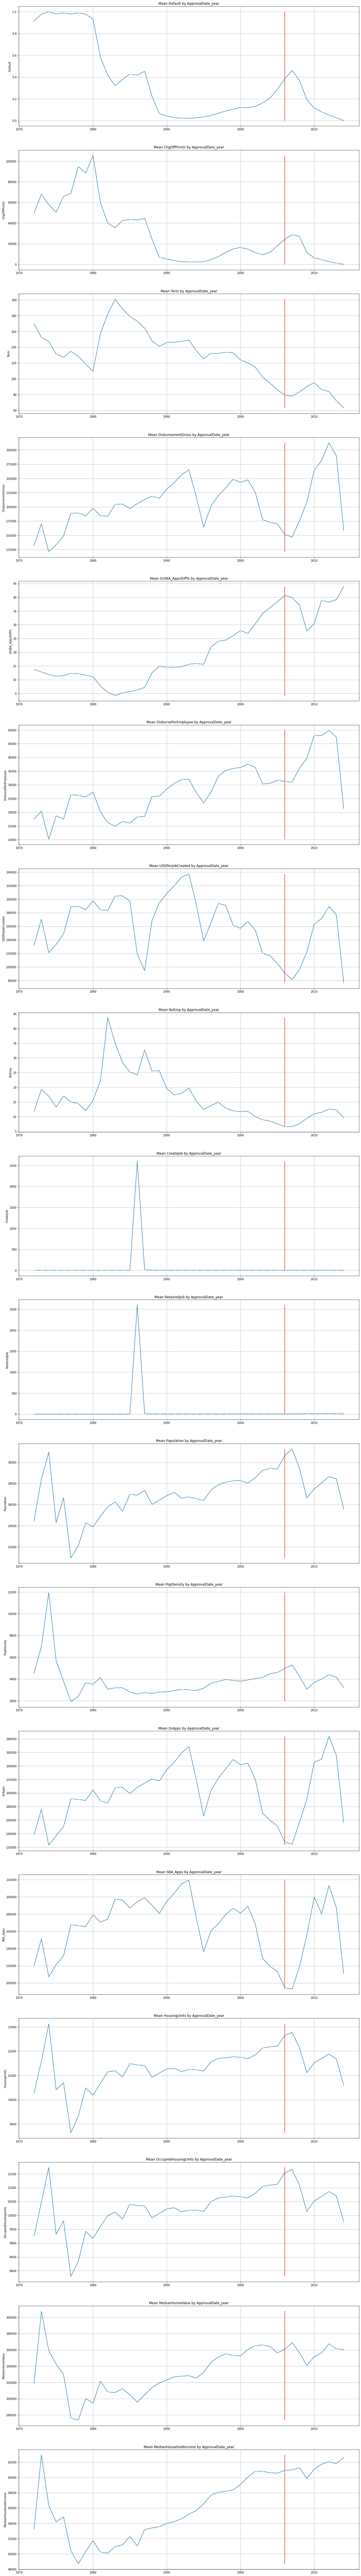

<Figure size 1584x720 with 0 Axes>

In [51]:
display(df_copy['ApprovalDate_year'].value_counts())

plt.figure(figsize=(22,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by ApprovalDate_year'.format(num))
    plt.grid(True)
    plt.vlines(x=[2006.0], ymin=vis[num].min(), ymax=vis[num].max(), color='r')
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
plt.show()

plt.figure(figsize=(22,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by ApprovalDate_year'.format(num))
    plt.grid(True)
    plt.vlines(x=[2006.0], ymin=vis[num].min(), ymax=vis[num].max(), color='r')
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
    plt.savefig('Mean_{}_ApprovalDate_year.jpeg'.format(num))
    plt.clf()

# ApprovalDate_month

3.0     83627
9.0     83065
4.0     80206
8.0     78776
6.0     78287
5.0     77193
7.0     76486
12.0    69931
10.0    69757
11.0    68400
1.0     67083
2.0     66342
Name: ApprovalDate_month, dtype: int64

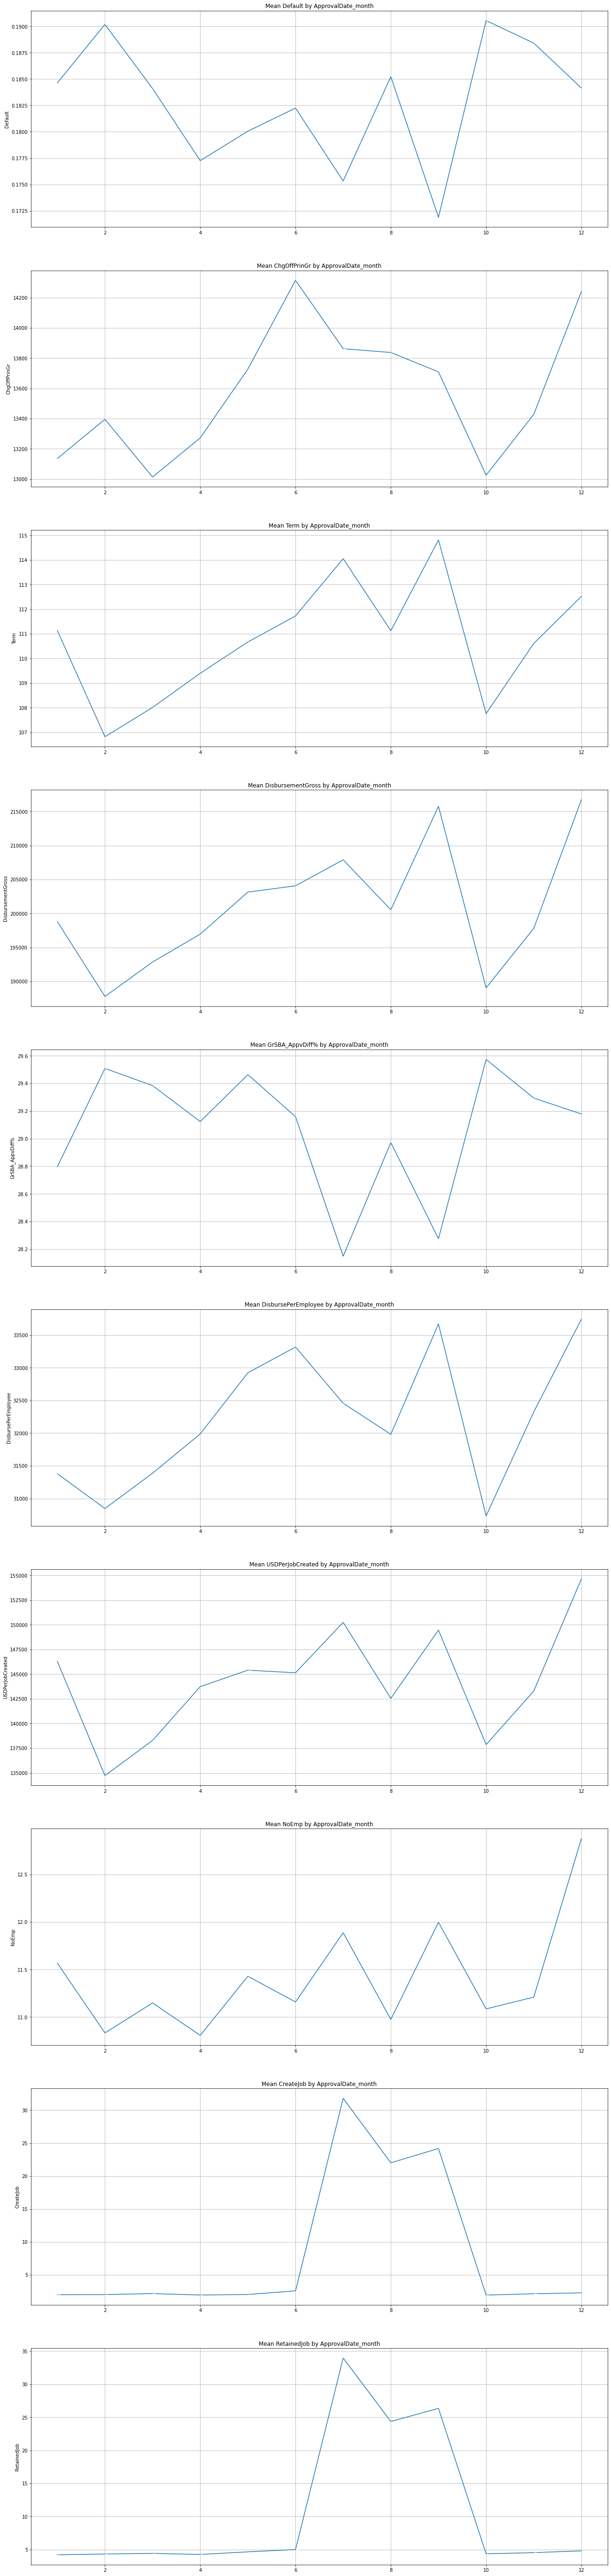

<Figure size 1584x720 with 0 Axes>

In [52]:
display(df_copy['ApprovalDate_month'].value_counts())

plt.figure(figsize=(22,100))
for i in range(len(num_features[:10])):
    num = num_features[:10][i]
    plt.subplot(len(num_features[:10]), 1, i + 1)
    vis = df_groupby_mean['ApprovalDate_month'][~(df_copy.groupby(by='ApprovalDate_month').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by ApprovalDate_month'.format(num))
    plt.grid(True)
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
plt.show()

plt.figure(figsize=(22,10))
for i in range(len(num_features[:10])):
    num = num_features[:10][i]
    vis = df_groupby_mean['ApprovalDate_month'][~(df_copy.groupby(by='ApprovalDate_month').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by ApprovalDate_month'.format(num))
    plt.grid(True)
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
    plt.savefig('Mean_{}_ApprovalDate_month.jpeg'.format(num))
    plt.clf()

In [21]:
~(df_copy.groupby(by='ApprovalDate_year').size().values < 10)

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# DisbursementDate_year

2006.0    79309
2005.0    74771
2004.0    70208
2007.0    68945
2003.0    59058
2002.0    45519
1995.0    44241
1997.0    40737
1999.0    39804
2000.0    39756
1996.0    37647
2001.0    37309
2008.0    37290
1998.0    35274
1994.0    30774
1993.0    22281
2009.0    21756
1992.0    19589
2010.0    16755
1991.0    15702
1990.0    14461
1989.0    11786
2011.0    11399
2012.0     5765
2013.0     2366
1987.0     2176
1988.0     2065
1986.0     2054
1985.0     2006
1984.0     1953
1983.0     1205
1982.0      653
1980.0      505
1981.0      454
1979.0      336
1978.0      249
2014.0      234
1977.0      130
1976.0       67
1975.0       46
1973.0       45
1972.0       35
1974.0       35
1971.0       15
1970.0       14
1969.0        3
1968.0        2
1948.0        1
Name: DisbursementDate_year, dtype: int64

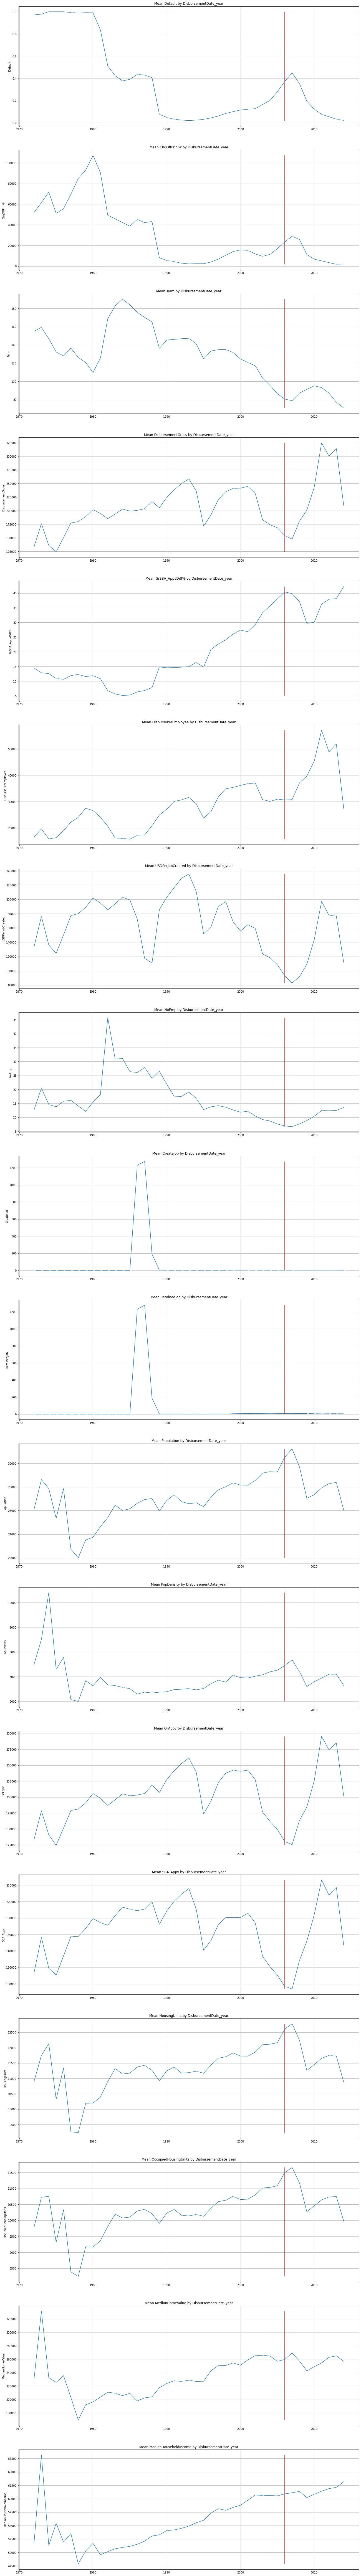

<Figure size 1584x720 with 0 Axes>

In [53]:
display(df_copy['DisbursementDate_year'].value_counts())

plt.figure(figsize=(22,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['DisbursementDate_year'][~(df_copy.groupby(by='DisbursementDate_year').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by DisbursementDate_year'.format(num))
    plt.grid(True)
    plt.vlines(x=[2006.0], ymin=vis[num].min(), ymax=vis[num].max(), color='r')
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
plt.show()

plt.figure(figsize=(22,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['DisbursementDate_year'][~(df_copy.groupby(by='DisbursementDate_year').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by DisbursementDate_year'.format(num))
    plt.grid(True)
    plt.vlines(x=[2006.0], ymin=vis[num].min(), ymax=vis[num].max(), color='r')
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
    plt.savefig('Mean_{}_DisbursementDate_year.jpeg'.format(num))
    plt.clf()

# DisbursementDate_month

4.0     106004
10.0    101803
7.0      98462
1.0      95716
9.0      64804
3.0      64164
12.0     63378
5.0      62981
6.0      62412
8.0      60691
11.0     59316
2.0      57054
Name: DisbursementDate_month, dtype: int64

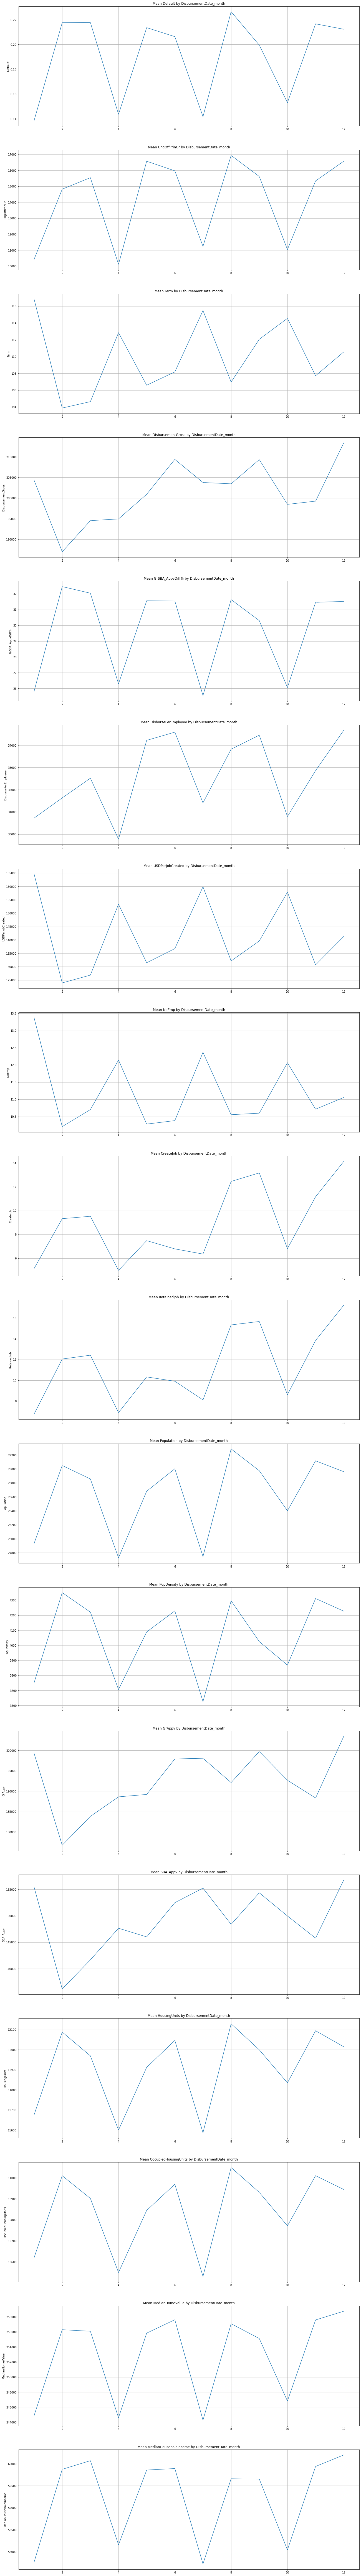

<Figure size 1584x720 with 0 Axes>

In [54]:
display(df_copy['DisbursementDate_month'].value_counts())

plt.figure(figsize=(22,170))
for i in range(len(num_features)):
    num = num_features[i]
    plt.subplot(len(num_features), 1, i + 1)
    vis = df_groupby_mean['DisbursementDate_month'][~(df_copy.groupby(by='DisbursementDate_month').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by DisbursementDate_month'.format(num))
    plt.grid(True)
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
plt.show()

plt.figure(figsize=(22,10))
for i in range(len(num_features)):
    num = num_features[i]
    vis = df_groupby_mean['DisbursementDate_month'][~(df_copy.groupby(by='DisbursementDate_month').size().values < 30)]
    vis.index = [int(i) for i in list(vis.index)]
    plt.title('Mean {} by DisbursementDate_month'.format(num))
    plt.grid(True)
    sns.lineplot(x=vis.index, y=vis[num], marker=True)
    plt.savefig('Mean_{}_DisbursementDate_month.jpeg'.format(num))
    plt.clf()

In [6]:
display(df_copy.iloc[:3,:23])
display(df_copy.iloc[:3,23:])

LoanNr_ChkDgt                         Name         City State    Zip  \
0     1000014003               ABC HOBBYCRAFT   EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)    NEW PARIS    IN  46526   
2     1000034009        WHITLOCK DDS, TODD M.  BLOOMINGTON    IN  47401   

                      Bank BankState ApprovalDate   Term  NoEmp  ...  \
0         FIFTH THIRD BANK        OH   1997-02-28   84.0    4.0  ...   
1          1ST SOURCE BANK        IN   1997-02-28   60.0    2.0  ...   
2  GRANT COUNTY STATE BANK        IN   1997-02-28  180.0    7.0  ...   

   IsFranchised  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  \
0           0.0          -1        0.0     1.0         NaN        1999-02-28   
1           0.0          -1        0.0     1.0         NaN        1997-05-31   
2           0.0          -1        0.0     0.0         NaN        1997-12-31   

   DisbursementGross BalanceGross Default  ChgOffPrinGr  
0            60000.0          0.0     0.0           0.0  
1            40000.0          0.0     0.0           0.0  
2           287000.0          0.0     0.0           0.0  

[3 rows x 23 columns]

GrAppv  SBA_Appv                  Industry  ChgOffDate_year  \
0   60000.0   48000.0              Retail_trade              NaN   
1   40000.0   32000.0           Accom/Food_serv              NaN   
2  287000.0  215250.0  Healthcare/Social_assist              NaN   

   ChgOffDate_month  ChgOffDate_day  DisbursementDate_year  \
0               NaN             NaN                 1999.0   
1               NaN             NaN                 1997.0   
2               NaN             NaN                 1997.0   

   DisbursementDate_month  DisbursementDate_day  ApprovalDate_year  ...  \
0                     2.0                  28.0             1997.0  ...   
1                     5.0                  31.0             1997.0  ...   
2                    12.0                  31.0             1997.0  ...   

   ApprovalDate_day  Population  PopDensity  HousingUnits  \
0              28.0     31457.0      1939.0       14267.0   
1              28.0     30671.0       457.0       11847.0   
2              28.0     41011.0       495.0       19124.0   

   OccupiedHousingUnits  MedianHomeValue  MedianHouseholdIncome  \
0               12895.0         115600.0                48618.0   
1               10938.0         120200.0                47863.0   
2               17562.0         207900.0                45415.0   

   USDPerJobCreated  DisbursePerEmployee  GrSBA_AppvDiff%  
0           60000.0         12000.000000             20.0  
1           40000.0         13333.333333             20.0  
2          287000.0         35875.000000             25.0  

[3 rows x 21 columns]

In [55]:
df_copy[['CreateJob', 'USDPerJobCreated']].describe()

CreateJob  USDPerJobCreated
count  899153.000000      8.991530e+05
mean        8.410906      1.443573e+05
std       236.326153      2.378652e+05
min         0.000000      0.000000e+00
25%         0.000000      2.500000e+04
50%         0.000000      6.000000e+04
75%         1.000000      1.500000e+05
max      8800.000000      1.144632e+07

In [7]:
df_copy.to_csv('cleaning3.csv', index=False)